<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ISE-291-Term-Project" data-toc-modified-id="ISE-291-Term-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ISE 291 Term Project</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li><li><span><a href="#Task-9" data-toc-modified-id="Task-9-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Task-9</a></span></li><li><span><a href="#Task-10" data-toc-modified-id="Task-10-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Task-10</a></span></li><li><span><a href="#References" data-toc-modified-id="References-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></span></li></ul></li></ul></div>

# ISE 291 Term Project 

Group Number =   1

Group Members: 

Names : 
Ammar Alhmmad                             
Student IDs : 
201920670


## Task-1

In [240]:
import pandas as pd

df = pd.read_csv('Group_06_10_A.csv', delimiter =',')
from matplotlib import pyplot as plt
import seaborn as sns
df['Manufacturer']=df['Manufacturer'].replace("BeEmW","BMW")
df['Manufacturer']=df['Manufacturer'].replace("JournalMotors","Journal Motors")
df['Manufacturer']=df['Manufacturer'].replace("Toyoda","Toyota")
df['Manufacturer']=df['Manufacturer'].replace("Masda","Mazda")
df['Manufacturer']=df['Manufacturer'].replace("Wolksvagon","volkswagen")
df['Manufacturer']=df['Manufacturer'].replace("Honta","Honda")
df['Manufacturer']=df['Manufacturer'].replace("Fourd","Ford")
df['Manufacturer']=df['Manufacturer'].replace("Nesshan","Nissan")
df['Manufacturer']=df['Manufacturer'].replace("Shevy","Chevy")
df['Manufacturer']=df['Manufacturer'].replace("Huendae","Hyundai")
df['Manufacturer']=df['Manufacturer'].replace("Geep","jeep")
df['Manufacturer']=df['Manufacturer'].replace("Mercetes","Mercedes")

#Second Column Editing 
# Making each word Capital 

df["Type"]=df["Type"].replace("sedan","SEDAN")
df["Type"]=df["Type"].replace("suv","SUV")
df["Type"]=df["Type"].replace("crossover","CROSSOVER")


#Culomn 5 conversion to numerical 
df["Model_Price"]=df["Model_Price"].str.replace(',','')
df["Model_Price"]=df["Model_Price"].str.replace('SAR','')
df['Model_Price'] = df['Model_Price'].fillna(0)
df['Model_Price'] = df['Model_Price'].astype('int')
df['Model_Price'] = df["Model_Price"].replace(0,df['Model_Price'].mean())
df['Model_Price'] = df['Model_Price'].astype('int')

#Column 7 conversion to numerical 
df["Sale_Price"]=df["Sale_Price"].str.replace(',','')
df["Sale_Price"]=df["Sale_Price"].str.replace('SAR','')
df['Sale_Price'] = df['Sale_Price'].astype('int') 

#Column 8 convertion to numerical 
# This removes drops rows with outlier values of KPL.
for row in df.iterrows():
    if df.loc[row[0], "KPL"] > 25:
        #print(df.loc[row[0], "KPL"])
        df = df.drop(row[0])
#This standardizes KPL values.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[["KPL"]]) 
df["KPL"] = scaler.transform(df[["KPL"]]) 

# This removes inconsistinencies within Location
for row in df.iterrows():
    if df.loc[row[0], "Location"] == "Dhahran":
        df.loc[row[0], "Location"]= "Dhahran"
    if df.loc[row[0], "Location"] == "Madinah":
        df.loc[row[0], "Location"] = "Medina"
    if df.loc[row[0], "Location"] == "JED":
        df.loc[row[0], "Location"] = "Jeddah"
    if df.loc[row[0], "Location"] == "Makkah":
        df.loc[row[0], "Location"] = "Mecca"
    if df.loc[row[0], "Location"] == "DMM":
        df.loc[row[0], "Location"] = "Dammam"
    if df.loc[row[0], "Location"] == "RYD":
        df.loc[row[0], "Location"] = "Riyadh"
cata_columns = df.select_dtypes(include='object').columns


## Task-2

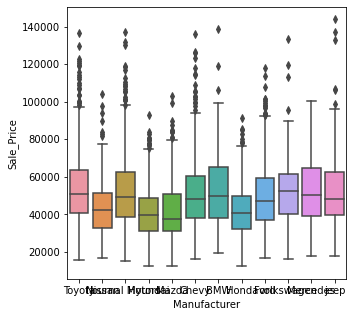

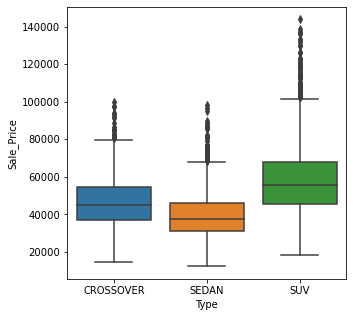

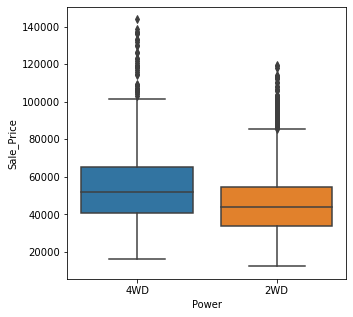

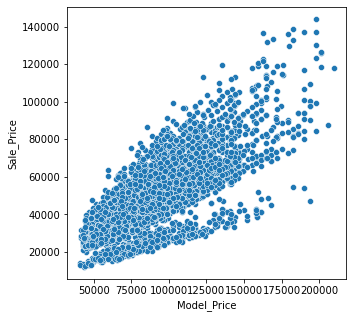

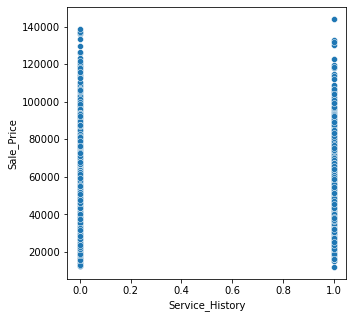

Manufacturer       Type  Cylinders  Model_Year  Model_Price  \
0             Toyota  CROSSOVER          4        2003        91202   
1             Toyota      SEDAN          4        2009        85590   
2             Nissan        SUV          6        1995        67569   
3             Toyota        SUV          6        2000       107427   
4     Journal Motors        SUV          4        2003       110836   
...              ...        ...        ...         ...          ...   
4995           Honda        SUV          4        2000        89522   
4996          Toyota        SUV          4        2006       120980   
4997            Ford  CROSSOVER          4        2001        85225   
4998            Ford      SEDAN          4        1999        81916   
4999           Honda      SEDAN          6        2003        63334   

      Sold_Year  Sale_Price  KM_Driven    KPL Power     Class Location  \
0          2009       44837     138556  12.40   4WD  standard  Dhahran   
1          2015       48722     143829  16.67   4WD  standard   Jeddah   
2          1999       39556      70443   7.48   2WD  standard   Medina   
3          2002       85675      85751   4.98   4WD  standard   Dammam   
4          2010       47382     137935   4.63   2WD  standard   Riyadh   
...         ...         ...        ...    ...   ...       ...      ...   
4995       2006       51698     117723  16.92   4WD  standard   Riyadh   
4996       2013       59476     236973  11.40   4WD  standard    Mecca   
4997       2007       38255     130141   7.21   2WD  standard   Riyadh   
4998       2001       51127      22781   5.90   4WD  standard    Mecca   
4999       2004       47880      17211  11.09   4WD  standard   Dammam   

      Accident_History  Owner_History   Color Seller_Type  Service_History  
0                    8              4  Silver  individual                0  
1                    5              3    Gray  individual                0  
2                    7              2     Red  individual                1  
3                    1              2   White     company                0  
4                    4              1   Black     company                0  
...                ...            ...     ...         ...              ...  
4995                 2              2    Blue  individual                0  
4996                 8              1    Gray  individual                0  
4997                 5              3   White     company                1  
4998                 5              2     Red  individual                0  
4999                11              3   Black     company                0  

[4958 rows x 17 columns]

['Toyota' 'Nissan' 'Journal Motors' 'Hyundai' 'Mazda' 'Chevy' 'BMW'
 'Honda' 'Ford' 'volkswagen' 'Mercedes' 'jeep']
['CROSSOVER' 'SEDAN' 'SUV']
['4WD' '2WD']
['standard' 'premium']
['Dhahran' 'Jeddah' 'Medina' 'Dammam' 'Riyadh' 'Mecca']
['Silver' 'Gray' 'Red' 'White' 'Black' 'Blue' 'Brown']
['individual' 'company']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4958 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      4958 non-null   object 
 1   Type              4958 non-null   object 
 2   Cylinders         4958 non-null   int64  
 3   Model_Year        4958 non-null   int64  
 4   Model_Price       4958 non-null   int64  
 5   Sold_Year         4958 non-null   int64  
 6   Sale_Price        4958 non-null   int64  
 7   KM_Driven         4958 non-null   int64  
 8   KPL               4958 non-null   float64
 9   Power             4958 non-null   object 
 10  Class  

In [4]:
import pandas as pd

df = pd.read_csv('Group_06_10_B.csv', delimiter =',')
from matplotlib import pyplot as plt
import seaborn as sns
df['Manufacturer']=df['Manufacturer'].replace("BeEmW","BMW")
df['Manufacturer']=df['Manufacturer'].replace("JournalMotors","Journal Motors")
df['Manufacturer']=df['Manufacturer'].replace("Toyoda","Toyota")
df['Manufacturer']=df['Manufacturer'].replace("Masda","Mazda")
df['Manufacturer']=df['Manufacturer'].replace("Wolksvagon","volkswagen")
df['Manufacturer']=df['Manufacturer'].replace("Honta","Honda")
df['Manufacturer']=df['Manufacturer'].replace("Fourd","Ford")
df['Manufacturer']=df['Manufacturer'].replace("Nesshan","Nissan")
df['Manufacturer']=df['Manufacturer'].replace("Shevy","Chevy")
df['Manufacturer']=df['Manufacturer'].replace("Huendae","Hyundai")
df['Manufacturer']=df['Manufacturer'].replace("Geep","jeep")
df['Manufacturer']=df['Manufacturer'].replace("Mercetes","Mercedes")

#Second Column Editing 
# Making each word Capital 

df["Type"]=df["Type"].replace("sedan","SEDAN")
df["Type"]=df["Type"].replace("suv","SUV")
df["Type"]=df["Type"].replace("crossover","CROSSOVER")


#Culomn 5 conversion to numerical 
df["Model_Price"]=df["Model_Price"].str.replace(',','')
df["Model_Price"]=df["Model_Price"].str.replace('SAR','')
df['Model_Price'] = df['Model_Price'].fillna(0)
df['Model_Price'] = df['Model_Price'].astype('int')
df['Model_Price'] = df["Model_Price"].replace(0,df['Model_Price'].mean())
df['Model_Price'] = df['Model_Price'].astype('int')

#Column 7 conversion to numerical 
df["Sale_Price"]=df["Sale_Price"].str.replace(',','')
df["Sale_Price"]=df["Sale_Price"].str.replace('SAR','')
df['Sale_Price'] = df['Sale_Price'].astype('int') 

#Column 8 convertion to numerical 
# This removes drops rows with outlier values of KPL.
for row in df.iterrows():
    if df.loc[row[0], "KPL"] > 25:
        #print(df.loc[row[0], "KPL"])
        df = df.drop(row[0])
# This standardizes KPL values.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df[["KPL"]]) 
# df["KPL"] = scaler.transform(df[["KPL"]]) 

# This removes inconsistinencies within Location
for row in df.iterrows():
    if df.loc[row[0], "Location"] == "Dhahran":
        df.loc[row[0], "Location"]= "Dhahran"
    if df.loc[row[0], "Location"] == "Madinah":
        df.loc[row[0], "Location"] = "Medina"
    if df.loc[row[0], "Location"] == "JED":
        df.loc[row[0], "Location"] = "Jeddah"
    if df.loc[row[0], "Location"] == "Makkah":
        df.loc[row[0], "Location"] = "Mecca"
    if df.loc[row[0], "Location"] == "DMM":
        df.loc[row[0], "Location"] = "Dammam"
    if df.loc[row[0], "Location"] == "RYD":
        df.loc[row[0], "Location"] = "Riyadh"
cata_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns.drop("Sale_Price")

for c in cata_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y="Sale_Price",x=c,data=df);
    plt.show()
for c in num_columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(y="Sale_Price",x=c,data=df);
    plt.show()
display(df)
for m in df.select_dtypes(include="object").columns:
    print(df[m].unique())
plt.show()
df.info()

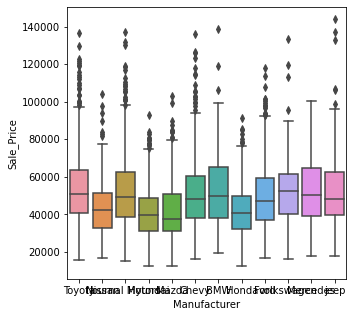

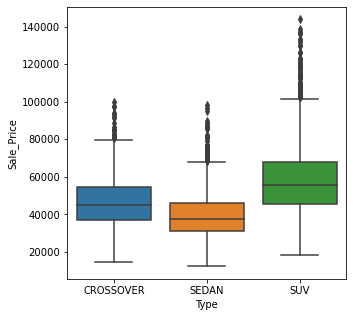

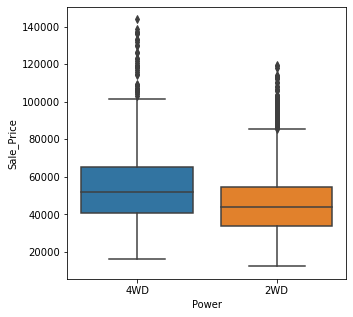

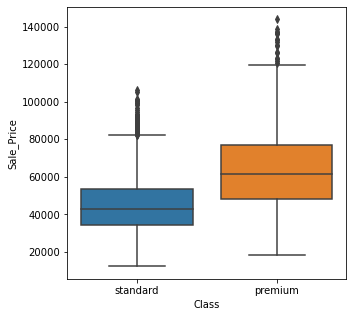

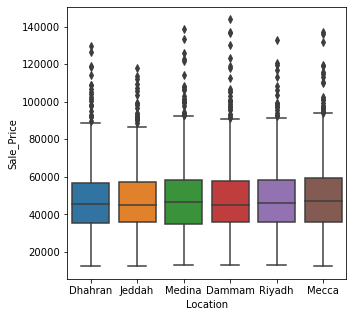

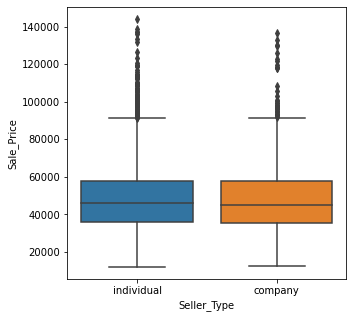

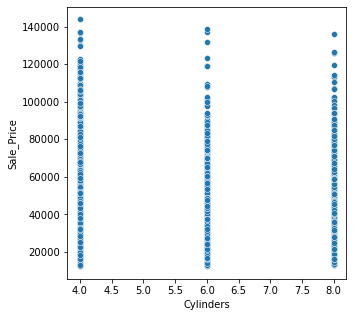

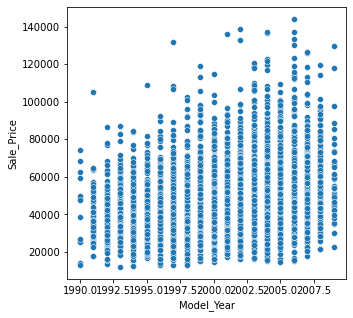

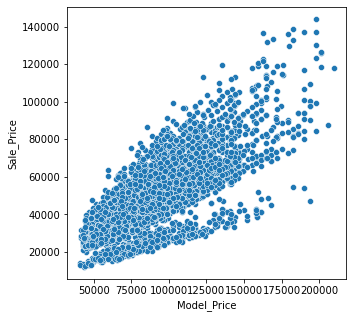

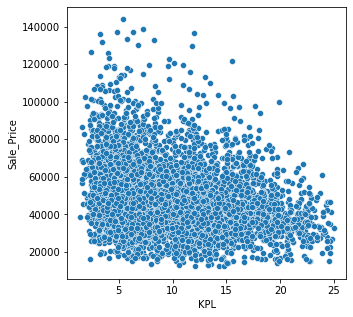

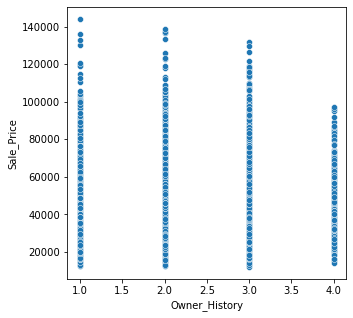

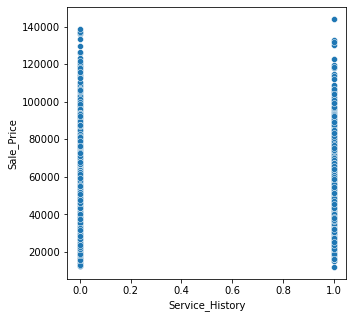

Manufacturer       Type  Cylinders  Model_Year  Model_Price  \
0             Toyota  CROSSOVER          4        2003        91202   
1             Toyota      SEDAN          4        2009        85590   
2             Nissan        SUV          6        1995        67569   
3             Toyota        SUV          6        2000       107427   
4     Journal Motors        SUV          4        2003       110836   
...              ...        ...        ...         ...          ...   
4995           Honda        SUV          4        2000        89522   
4996          Toyota        SUV          4        2006       120980   
4997            Ford  CROSSOVER          4        2001        85225   
4998            Ford      SEDAN          4        1999        81916   
4999           Honda      SEDAN          6        2003        63334   

      Sold_Year  Sale_Price  KM_Driven    KPL Power     Class Location  \
0          2009       44837     138556  12.40   4WD  standard  Dhahran   
1          2015       48722     143829  16.67   4WD  standard   Jeddah   
2          1999       39556      70443   7.48   2WD  standard   Medina   
3          2002       85675      85751   4.98   4WD  standard   Dammam   
4          2010       47382     137935   4.63   2WD  standard   Riyadh   
...         ...         ...        ...    ...   ...       ...      ...   
4995       2006       51698     117723  16.92   4WD  standard   Riyadh   
4996       2013       59476     236973  11.40   4WD  standard    Mecca   
4997       2007       38255     130141   7.21   2WD  standard   Riyadh   
4998       2001       51127      22781   5.90   4WD  standard    Mecca   
4999       2004       47880      17211  11.09   4WD  standard   Dammam   

      Accident_History  Owner_History   Color Seller_Type  Service_History  
0                    8              4  Silver  individual                0  
1                    5              3    Gray  individual                0  
2                    7              2     Red  individual                1  
3                    1              2   White     company                0  
4                    4              1   Black     company                0  
...                ...            ...     ...         ...              ...  
4995                 2              2    Blue  individual                0  
4996                 8              1    Gray  individual                0  
4997                 5              3   White     company                1  
4998                 5              2     Red  individual                0  
4999                11              3   Black     company                0  

[4958 rows x 17 columns]

['Toyota' 'Nissan' 'Journal Motors' 'Hyundai' 'Mazda' 'Chevy' 'BMW'
 'Honda' 'Ford' 'volkswagen' 'Mercedes' 'jeep']
['CROSSOVER' 'SEDAN' 'SUV']
['4WD' '2WD']
['standard' 'premium']
['Dhahran' 'Jeddah' 'Medina' 'Dammam' 'Riyadh' 'Mecca']
['Silver' 'Gray' 'Red' 'White' 'Black' 'Blue' 'Brown']
['individual' 'company']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4958 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      4958 non-null   object 
 1   Type              4958 non-null   object 
 2   Cylinders         4958 non-null   int64  
 3   Model_Year        4958 non-null   int64  
 4   Model_Price       4958 non-null   int64  
 5   Sold_Year         4958 non-null   int64  
 6   Sale_Price        4958 non-null   int64  
 7   KM_Driven         4958 non-null   int64  
 8   KPL               4958 non-null   float64
 9   Power             4958 non-null   object 
 10  Class  

In [5]:
import pandas as pd

df = pd.read_csv('Group_06_10_B.csv', delimiter =',')
from matplotlib import pyplot as plt
import seaborn as sns
df['Manufacturer']=df['Manufacturer'].replace("BeEmW","BMW")
df['Manufacturer']=df['Manufacturer'].replace("JournalMotors","Journal Motors")
df['Manufacturer']=df['Manufacturer'].replace("Toyoda","Toyota")
df['Manufacturer']=df['Manufacturer'].replace("Masda","Mazda")
df['Manufacturer']=df['Manufacturer'].replace("Wolksvagon","volkswagen")
df['Manufacturer']=df['Manufacturer'].replace("Honta","Honda")
df['Manufacturer']=df['Manufacturer'].replace("Fourd","Ford")
df['Manufacturer']=df['Manufacturer'].replace("Nesshan","Nissan")
df['Manufacturer']=df['Manufacturer'].replace("Shevy","Chevy")
df['Manufacturer']=df['Manufacturer'].replace("Huendae","Hyundai")
df['Manufacturer']=df['Manufacturer'].replace("Geep","jeep")
df['Manufacturer']=df['Manufacturer'].replace("Mercetes","Mercedes")

#Second Column Editing 
# Making each word Capital 

df["Type"]=df["Type"].replace("sedan","SEDAN")
df["Type"]=df["Type"].replace("suv","SUV")
df["Type"]=df["Type"].replace("crossover","CROSSOVER")


#Culomn 5 conversion to numerical 
df["Model_Price"]=df["Model_Price"].str.replace(',','')
df["Model_Price"]=df["Model_Price"].str.replace('SAR','')
df['Model_Price'] = df['Model_Price'].fillna(0)
df['Model_Price'] = df['Model_Price'].astype('int')
df['Model_Price'] = df["Model_Price"].replace(0,df['Model_Price'].mean())
df['Model_Price'] = df['Model_Price'].astype('int')

#Column 7 conversion to numerical 
df["Sale_Price"]=df["Sale_Price"].str.replace(',','')
df["Sale_Price"]=df["Sale_Price"].str.replace('SAR','')
df['Sale_Price'] = df['Sale_Price'].astype('int') 

#Column 8 convertion to numerical 
# This removes drops rows with outlier values of KPL.
for row in df.iterrows():
    if df.loc[row[0], "KPL"] > 25:
        #print(df.loc[row[0], "KPL"])
        df = df.drop(row[0])
# This standardizes KPL values.
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df[["KPL"]]) 
# df["KPL"] = scaler.transform(df[["KPL"]]) 

# This removes inconsistinencies within Location
for row in df.iterrows():
    if df.loc[row[0], "Location"] == "Dhahran":
        df.loc[row[0], "Location"]= "Dhahran"
    if df.loc[row[0], "Location"] == "Madinah":
        df.loc[row[0], "Location"] = "Medina"
    if df.loc[row[0], "Location"] == "JED":
        df.loc[row[0], "Location"] = "Jeddah"
    if df.loc[row[0], "Location"] == "Makkah":
        df.loc[row[0], "Location"] = "Mecca"
    if df.loc[row[0], "Location"] == "DMM":
        df.loc[row[0], "Location"] = "Dammam"
    if df.loc[row[0], "Location"] == "RYD":
        df.loc[row[0], "Location"] = "Riyadh"
cata_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns.drop("Sale_Price")

for c in cata_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(y="Sale_Price",x=c,data=df);
    plt.show()
for c in num_columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(y="Sale_Price",x=c,data=df);
    plt.show()
display(df)
for m in df.select_dtypes(include="object").columns:
    print(df[m].unique())
plt.show()
df.info()

## Task-3

In [234]:

import pandas as pd
non_numeric = []
for col in df:
    if df[col].dtypes == "object":
        non_numeric.append(col)
df2 = df.drop(columns=non_numeric)
corr = df2.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(4) 
corr=corr.apply(lambda x: np.abs(x))

sorted_corr = corr.sort_values(by=['Sale_Price'], ascending=False) # negative values will be considered using abs.
sorted_corr = sorted_corr['Sale_Price'].index
print('The top three correlated input variables are: ',sorted_corr[1:4].tolist(), 'The bottem three are : ', sorted_corr[7:len(sorted_corr)].tolist() )
#print(sorted_corr)


The top three correlated input variables are:  ['Model_Price', 'KM_Driven', 'KPL'] The bottem three are :  ['Sold_Year', 'Owner_History', 'Cylinders']


## Task-4

## Task-5

## Task-6

## Task-7

In [235]:
#assuming all variables are relevent to the output, the catgorical column must be numeric 
# in order to conduct the regression anlayses 
from sklearn.linear_model import LinearRegression
first_column = df.pop('Sale_Price')
df.insert(len(df.columns), 'Sale_Price', first_column)
# =====================Mapping==================================
# display(df.head())
Seller_Type_Mapping={'individual':0,'company':1}
Color_Mapping = {'Silver':0,'Gray':1,'Red':2,'White':3,'Black':4,'Blue':5,'Brown':6}
Power_Mapping = {'4WD':1,'2WD':0}
Type_Mapping = {'CROSSOVER':0,'SEDAN':1,'SUV':2}
Manufacturer_Mapping = {'Toyota':0,'Nissan':1,'Journal Motors':2,'Hyundai':3,'Mazda':4,'Chevy':5,'BMW':6,'Honda':7,'Ford':8,
'volkswagen':9,'Mercedes':10,'jeep':11}
location_mapping = {'Dhahran':0,
'Jeddah':1,
'Medina':2,
'Dammam':3, 'Riyadh': 4,'Mecca': 5 }
class_mapping = {'standard':0,
'premium':1}
# =======================================================================
df['Manufacturer'] = df['Manufacturer'].map(Manufacturer_Mapping)
df['Type'] = df['Type'].map(Type_Mapping)

df['Power'] = df['Power'].map(Power_Mapping)
df['Color'] = df['Color'].map(Color_Mapping)
df['Seller_Type']=df['Seller_Type'].map(Seller_Type_Mapping)
df['Class'] = df['Class'].map(class_mapping)
df['Location'] = df['Location'].map(location_mapping)
display(df.head())

# =======================================================================
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]
from sklearn.metrics import mean_squared_error

# now after training the data we need to find out which method preform best 

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1))
## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2))


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3))
# as it can be seen in this data, Lasso preform the best. thus all input variables 
#seems to be relevent

Manufacturer  Type  Cylinders  Model_Year  Model_Price  Sold_Year  \
0             0     0          4        2003        91202       2009   
1             0     1          4        2009        85590       2015   
2             1     2          6        1995        67569       1999   
3             0     2          6        2000       107427       2002   
4             2     2          4        2003       110836       2010   

   KM_Driven    KPL  Power  Class  Location  Accident_History  Owner_History  \
0     138556  12.40      1      0         0                 8              4   
1     143829  16.67      1      0         1                 5              3   
2      70443   7.48      0      0         2                 7              2   
3      85751   4.98      1      0         3                 1              2   
4     137935   4.63      0      0         4                 4              1   

   Color  Seller_Type  Service_History  Sale_Price  
0      0            0                0       44837  
1      1            0                0       48722  
2      2            0                1       39556  
3      3            1                0       85675  
4      4            1                0       47382

The MSE using OLS is: 0.10702994056482404
The MSE using Ridge is: 0.10703662912918407
The MSE using Lasso is: 0.10734650117993944


## Task-8

In [236]:
Xo = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

from sklearn.linear_model import Ridge
regr = Ridge(alpha=500)
regr.fit(Xo, y)
best_beta = np.round(regr.coef_,2)
best_beta_0 = np.round(regr.intercept_,2)
print(f'The best values for the estimates are :', best_beta_0, best_beta.tolist())
print(f"""\n(it was observed that in the estimated values of B1 there are some shrinking. Therefore, this indicates that the columns
that are correlated is removed) """)

The best values for the estimates are : -57471.47 [-328.05, 501.78, 368.92, 4263.36, 0.53, -4225.45, -0.02, 583.12, 40.91, 324.65, 106.02, -468.21, -470.27, 51.18, 208.02, 1565.12]

(it was observed that in the estimated values of B1 there are some shrinking. Therefore, this indicates that the columns
that are correlated is removed) 


## Task-9

## Task-10

## References